In [1]:
%load_ext autoreload
%autoreload  2

from matplotlib import pyplot

from hcve_lib.data import format_features
from hcve_lib.feature_importance import get_tree_feature_importance, plot_standard_importance
from hcve_lib.utils import notebook_init, loc
from hcve_lib.visualisation import b

notebook_init()

from hcve_lib.tracking import search_latest_root_completed_run

from deps.common import get_variables_cached

data, metadata, X, y = get_variables_cached()

import logging

from deps.common import get_variables_cached
# noinspection PyUnresolvedReferences
from deps.custom_types import Method
from deps.logger import logger
from deps.pipelines import XGBClassifierMethod
from hcve_lib.cv import series_to_target

/home/sitnarf/.local/share/virtualenvs/homage-fl-Ms4N7PDp/lib/python3.9/site-packages/dash_bootstrap_components/_table.py:5: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
run, result = search_latest_root_completed_run('classify_cohort', 'xgb')

In [4]:
for split_name, split in result.items():
    importance = get_tree_feature_importance(split)
    fig = plot_standard_importance(importance, metadata)
    fig.update_layout(height=600, title=split_name)
    fig.show()
    # TODO: only one
    break

In [35]:
from hcve_lib.utils import split_data
import shap

X_train, y_train, X_test, y_test = split_data(X, y, result[0])

explainer = shap.Explainer(result[0]['model'][-1].inner)
shap_train = explainer(format_features(X_train, metadata))
shap_test = explainer(format_features(X_test, metadata))

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


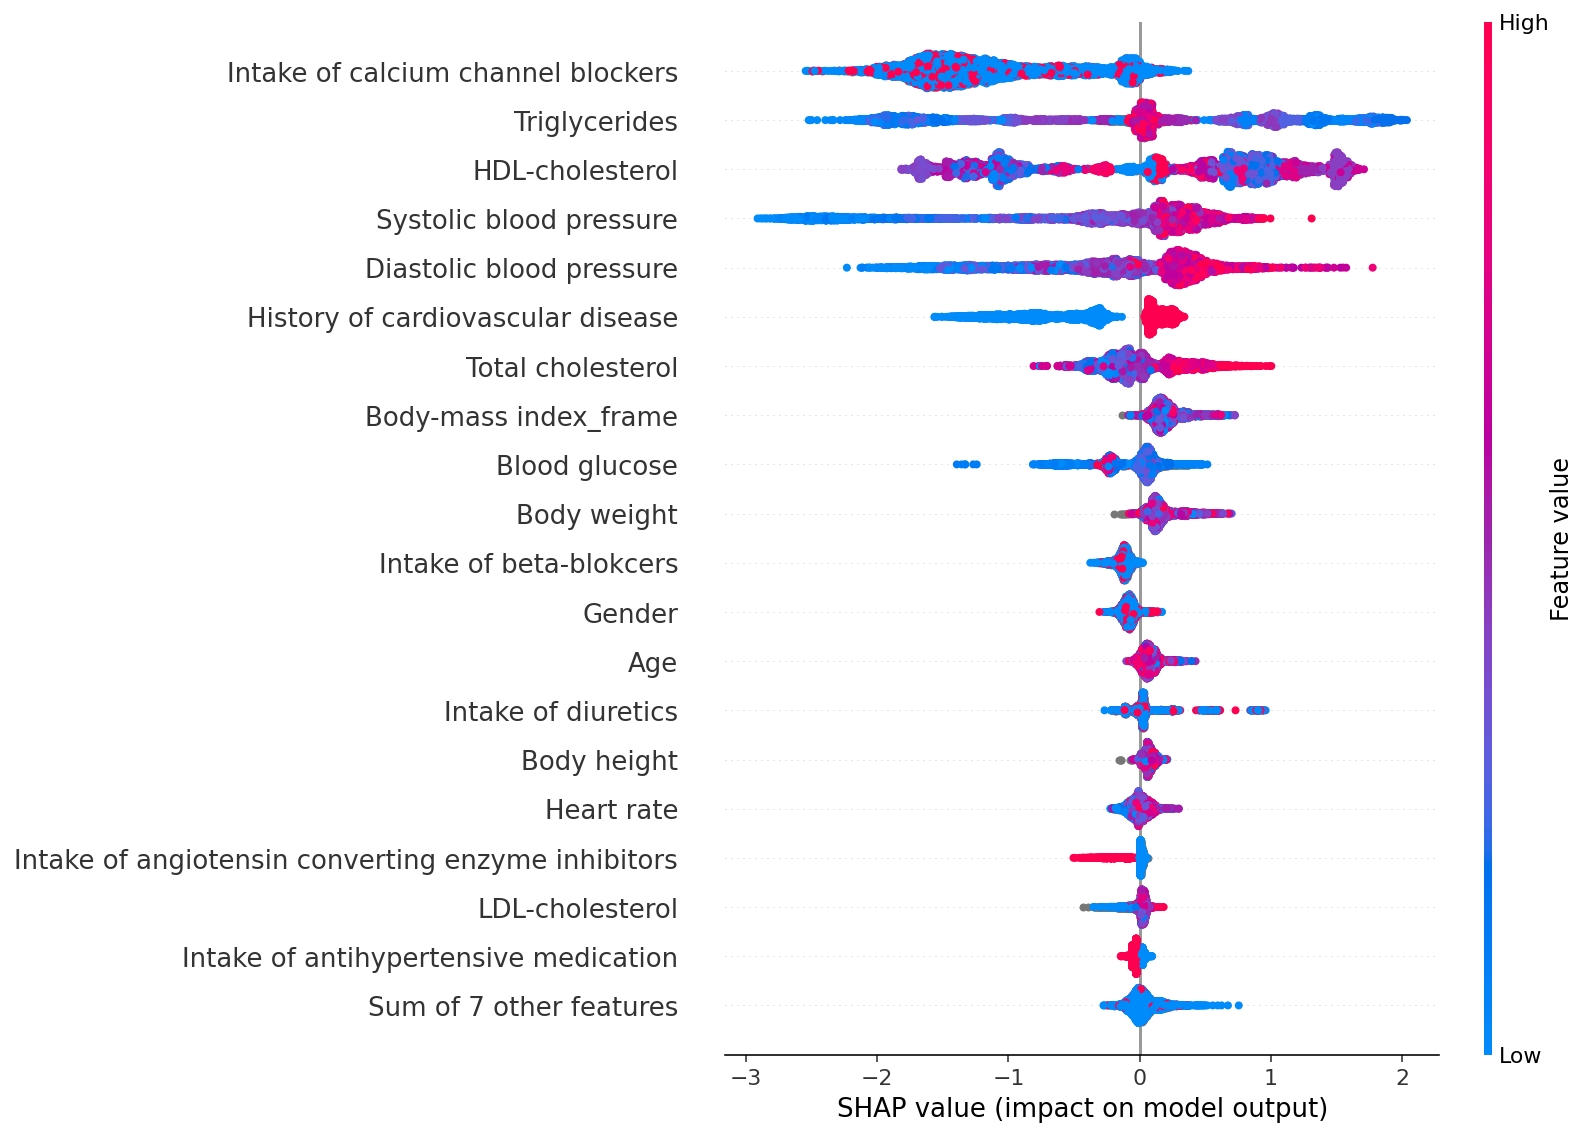

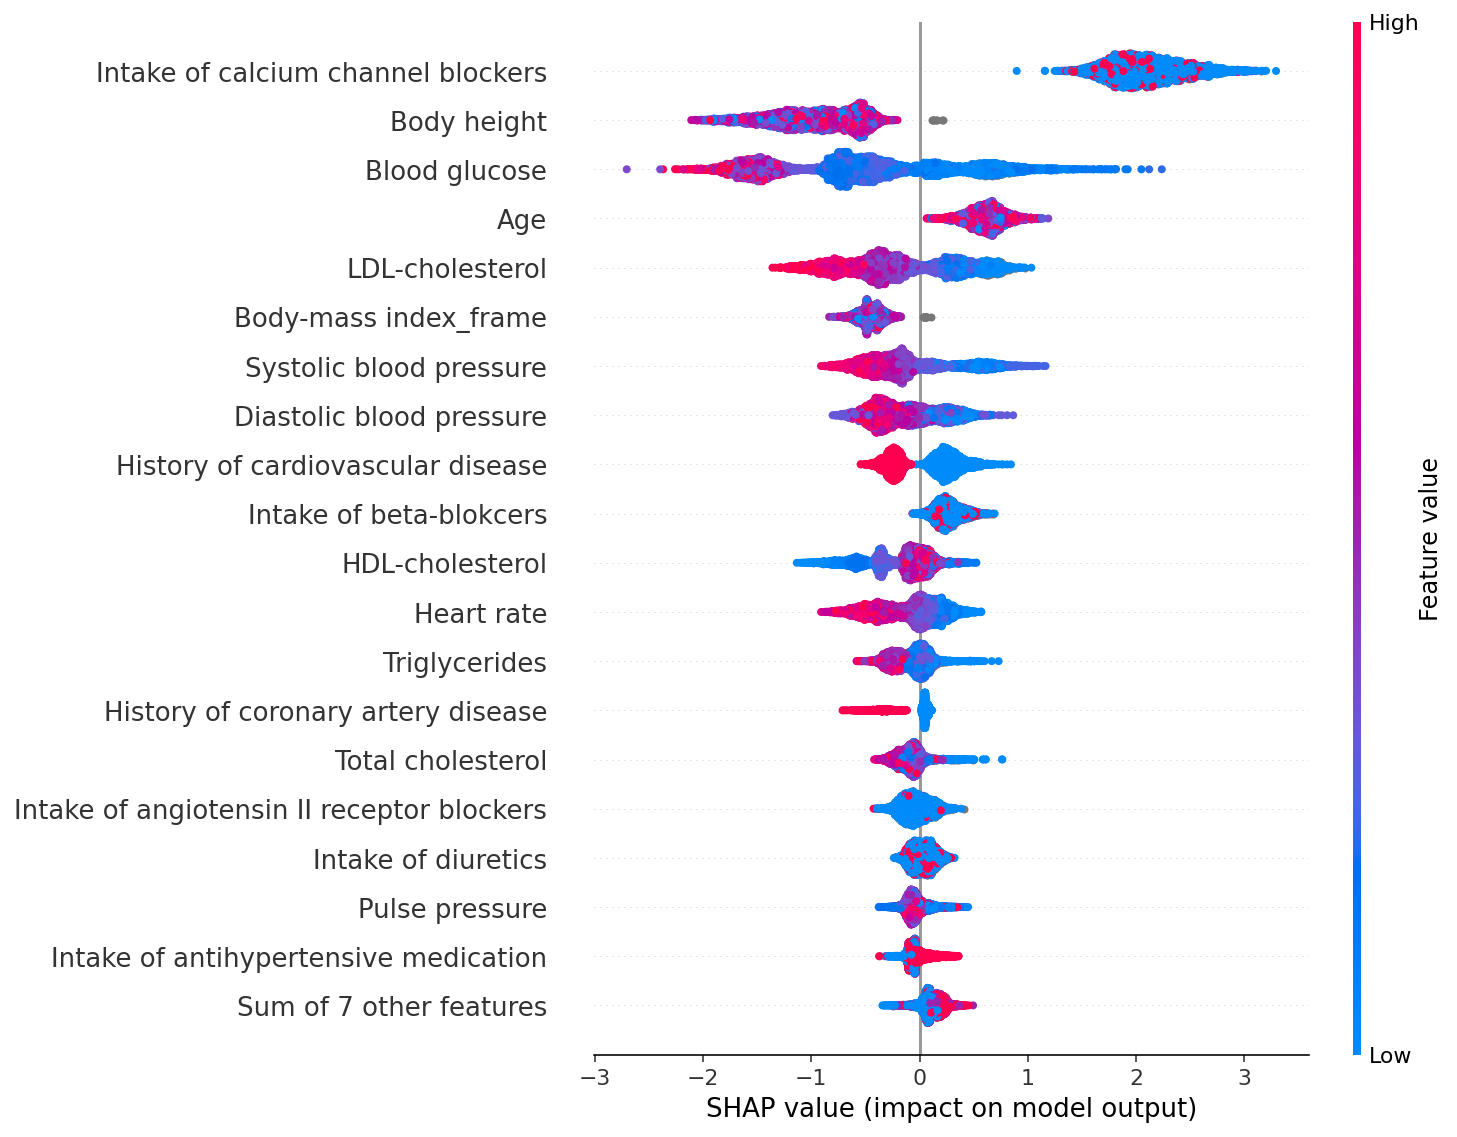

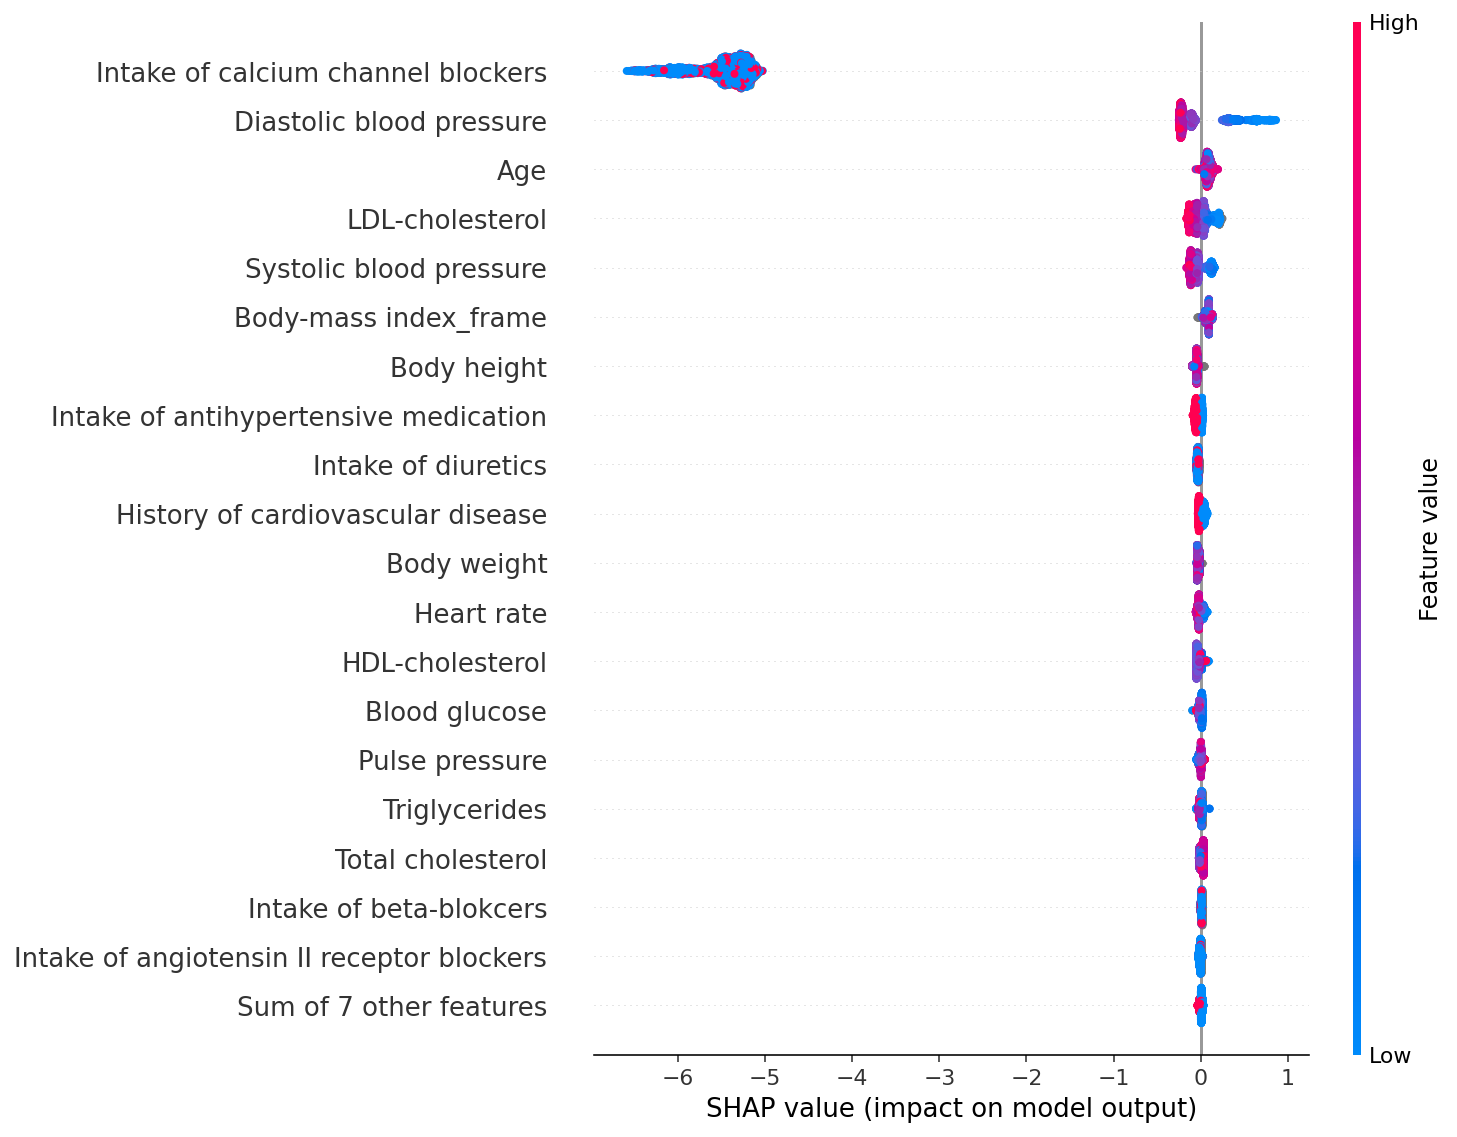

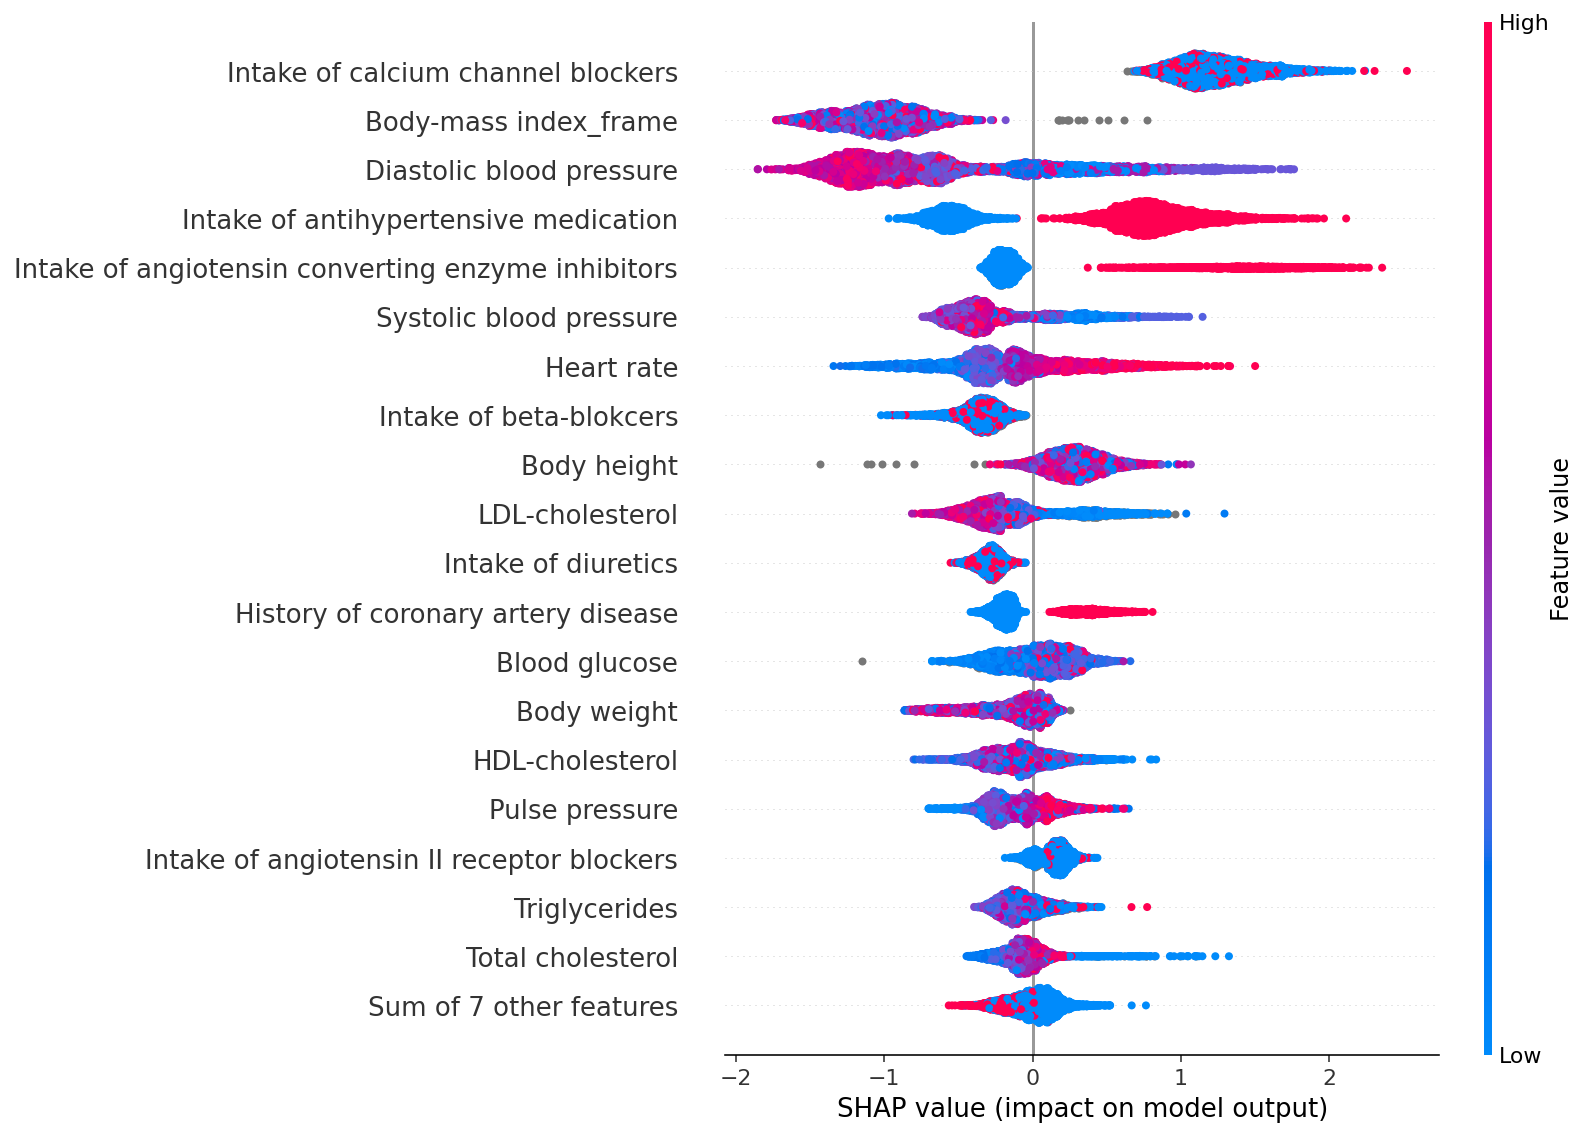

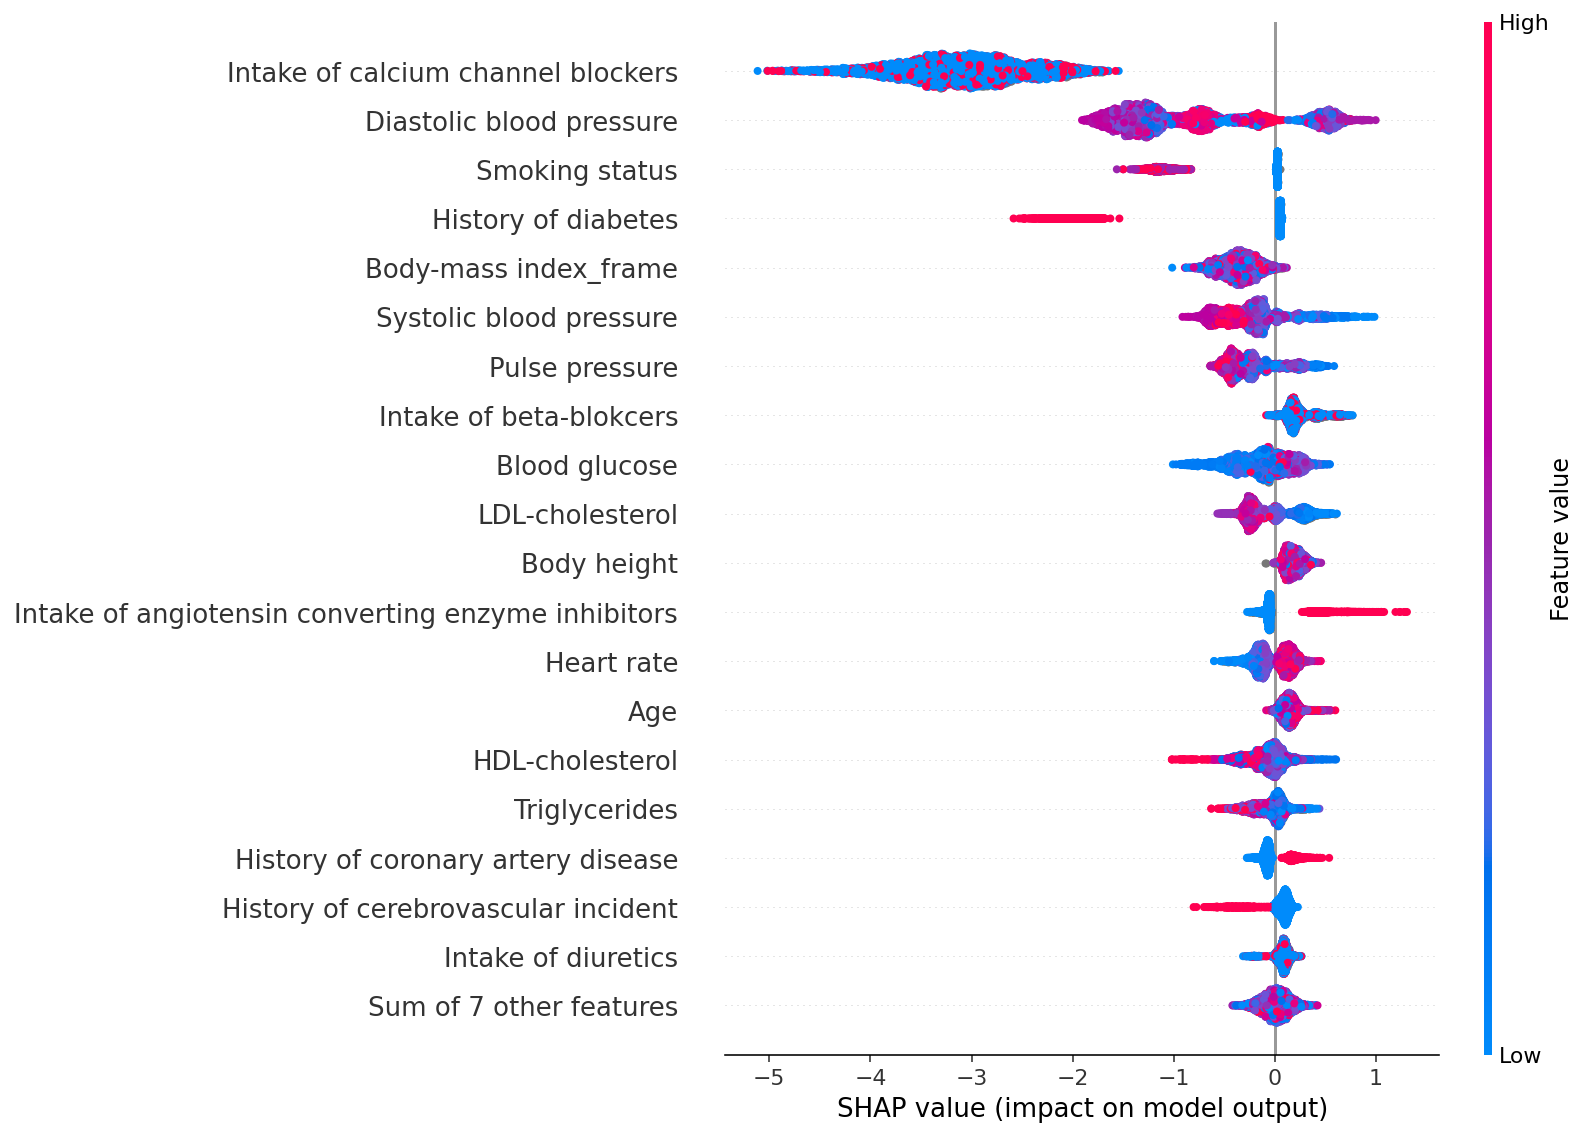

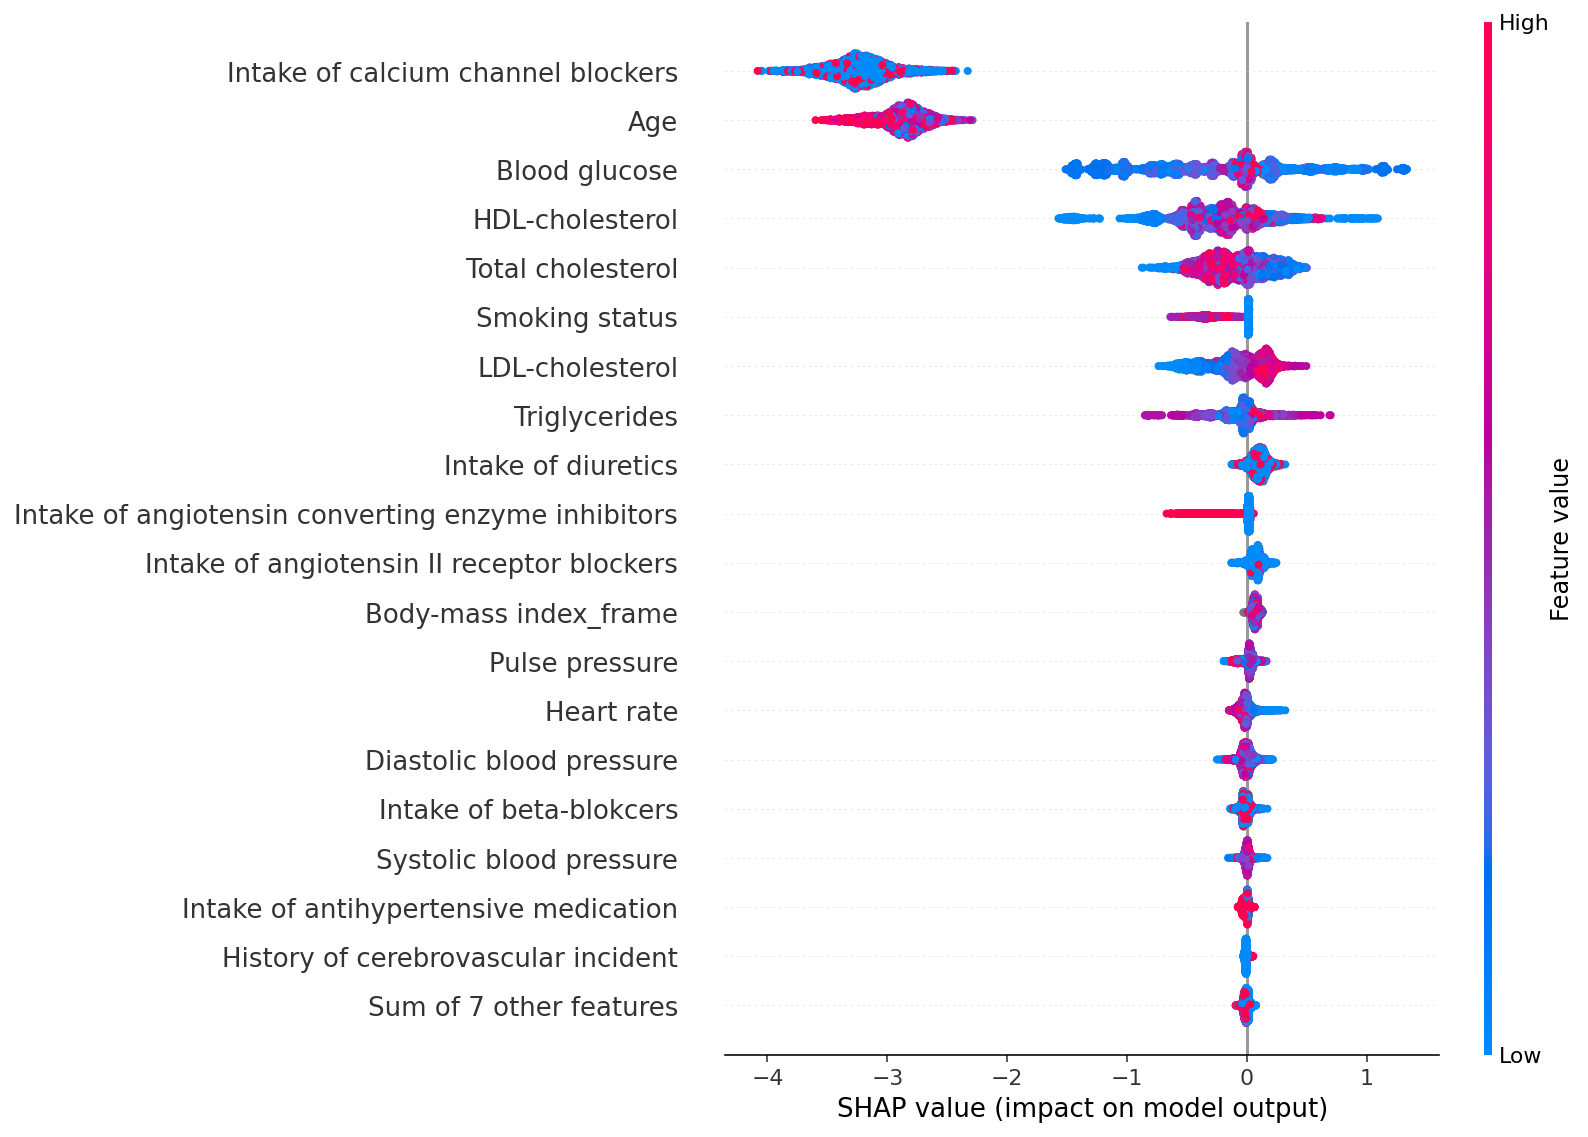

In [6]:
for num, cohort_name in enumerate(result[0]['y_score'].columns):
    b(cohort_name)
    pyplot.rcParams['figure.facecolor'] = 'white'
    shap.plots.beeswarm(shap_test[:, :, num], max_display=20)